In [16]:
import numpy as np  #for dealing high dimensional data
import pandas as pd  #to do statistical data analysis
import matplotlib.pyplot as plt  #for 2D visualization
import seaborn as sns  #High end data visualization

In [17]:
import pandas as pd
df = pd.read_excel("flood dataset.xlsx")
print(df.head())

   Temp  Humidity  Cloud Cover  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  \
0    29        70           30  3248.6     73.4    386.2   2122.8    666.1   
1    28        75           40  3326.6      9.3    275.7   2403.4    638.2   
2    28        75           42  3271.2     21.7    336.3   2343.0    570.1   
3    29        71           44  3129.7     26.7    339.4   2398.2    365.3   
4    31        74           40  2741.6     23.4    378.5   1881.5    458.1   

      avgjune    sub  flood  
0  274.866667  649.9      0  
1  130.300000  256.4      1  
2  186.200000  308.9      0  
3  366.066667  862.5      0  
4  283.400000  586.9      0  


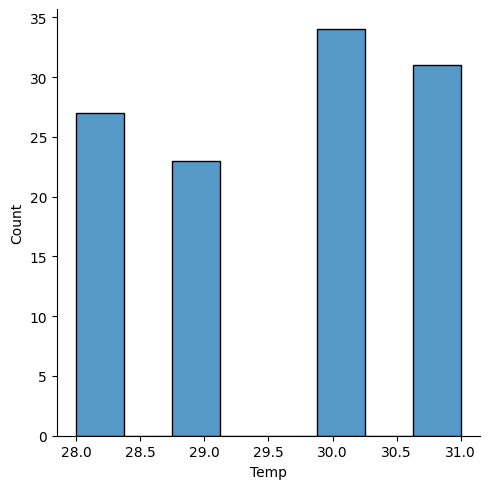

In [18]:
import seaborn as sns 
print(sns.displot(df['Temp']))

Axes(0.125,0.11;0.775x0.77)


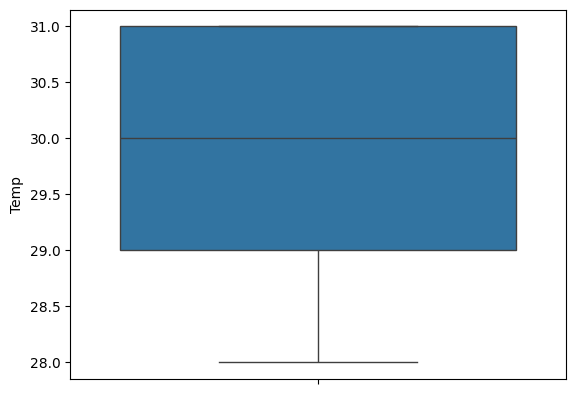

In [19]:
print(sns.boxplot(df['Temp']))

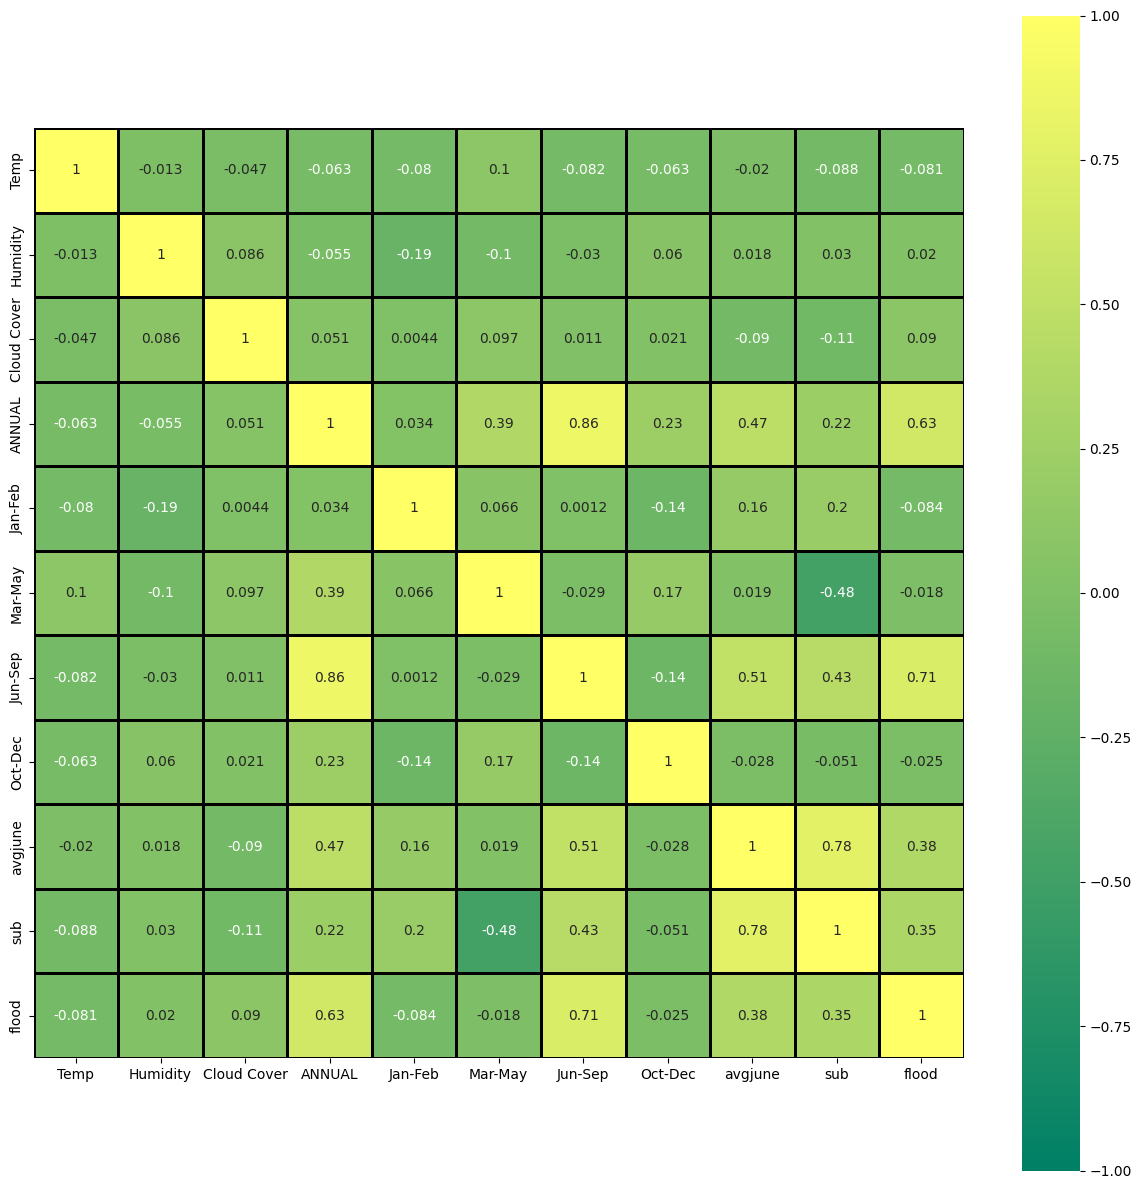

In [20]:
fig=plt.gcf()
fig.set_size_inches(15,15)
fig=sns.heatmap(df.corr(),annot=True,cmap='summer',linewidths=1,
                linecolor='k',square=True,
                mask=False,vmin=-1,vmax=1,
                cbar_kws={"orientation":"vertical"},cbar=True)

In [21]:
df.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   Oct-Dec      115 non-null    float64
 8   avgjune      115 non-null    float64
 9   sub          115 non-null    float64
 10  flood        115 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 10.0 KB
None


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,115.0,29.600000,1.122341,28.0,29.000000,30.000000,31.000000,31.000000
Humidity,115.0,73.852174,2.947623,70.0,71.000000,74.000000,76.000000,79.000000
Cloud Cover,115.0,36.286957,4.330158,30.0,32.500000,36.000000,40.000000,44.000000
ANNUAL,115.0,2925.487826,422.112193,2068.8,2627.900000,2937.500000,3164.100000,4257.800000
Jan-Feb,115.0,27.739130,22.361032,0.3,10.250000,20.500000,41.600000,98.100000
Mar-May,115.0,377.253913,151.091850,89.9,276.750000,342.000000,442.300000,915.200000
Jun-Sep,115.0,2022.840870,386.254397,1104.3,1768.850000,1948.700000,2242.900000,3451.300000
Oct-Dec,115.0,497.636522,129.860643,166.6,407.450000,501.500000,584.550000,823.300000
avgjune,115.0,218.100870,62.547597,65.6,179.666667,211.033333,263.833333,366.066667
sub,115.0,439.801739,210.438813,34.2,295.000000,430.600000,577.650000,982.700000


In [24]:
df.isnull().any()

Temp           False
Humidity       False
Cloud Cover    False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
avgjune        False
sub            False
flood          False
dtype: bool

In [25]:
x=df.iloc[:,2:7].values

In [26]:
y=df.iloc[:,9:].values

In [27]:
X = df[['Cloud Cover','ANNUAL','Jan-Feb','Mar-May','Jun-Sep']]
y = df['flood']

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)


In [35]:
from xgboost import XGBClassifier

model = XGBClassifier(
    eval_metric='logloss'
)
model.fit(X_scaled, y)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [36]:
from joblib import dump

dump(model, 'floods.save')
dump(sc, 'transform.save')


['transform.save']

In [37]:
from joblib import dump

dump(model, 'floods.save')

['floods.save']

In [38]:
from joblib import load

m = load('floods.save')
s = load('transform.save')

print(type(m))
print(type(s))

<class 'xgboost.sklearn.XGBClassifier'>
<class 'sklearn.preprocessing._data.StandardScaler'>


In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from joblib import dump

# Load dataset
df = pd.read_excel("flood dataset.xlsx")

# Features & target
X = df[['Cloud Cover','ANNUAL','Jan-Feb','Mar-May','Jun-Sep']]
y = df['flood']

# Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Model training
model = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False
)
model.fit(X_scaled, y)

# SAVE (MOST IMPORTANT)
dump(model, 'floods.save')
dump(sc, 'transform.save')

print("Files saved successfully")


Files saved successfully


C:\Users\hari\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:200: UserWarning: [10:58:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [31]:
df1 = pd.read_excel("rainfall in india 1901-2015.xlsx")
df1.head()

,COUNTRY,STATE,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,India,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,India,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,India,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,India,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,India,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 1.0
